In [332]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [333]:
import pandas as pd
import numpy as np
scores = pd.read_csv("ta2_seed_score_statuses_reformatted_metrics.csv", index_col=0).T
# Add measures to index names
scores = scores.rename(index = {a:"{} ({})".format(a,b) for a,b in zip(scores.index.values,scores['Metric'])}).ix[:,:11]

In [334]:
# Replace failure messages by 0 or NaN
fail = 0 # float(nan)
scores = scores.applymap(lambda x: float(x) if isinstance(x,str) and x.replace('.','',1).isnumeric() else fail)

In [335]:
# Optional: normalize the data
from sklearn import preprocessing
scores = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(scores.T), columns=scores.T.columns, index=scores.T.index).T

In [336]:
# Drop participants without scores
scores = scores.drop(['columbiau_uchicago', 'cra_eve'], axis=1)

In [337]:
# Make us stand out
from matplotlib.colors import ListedColormap
greys = np.linspace(0,0.8,10)
colors = [[g,g,g] for g in greys]
colors[9] = [1,0,0] # baseline
colors[7] = [0,1,0] # SRI
mymap=ListedColormap(colors)

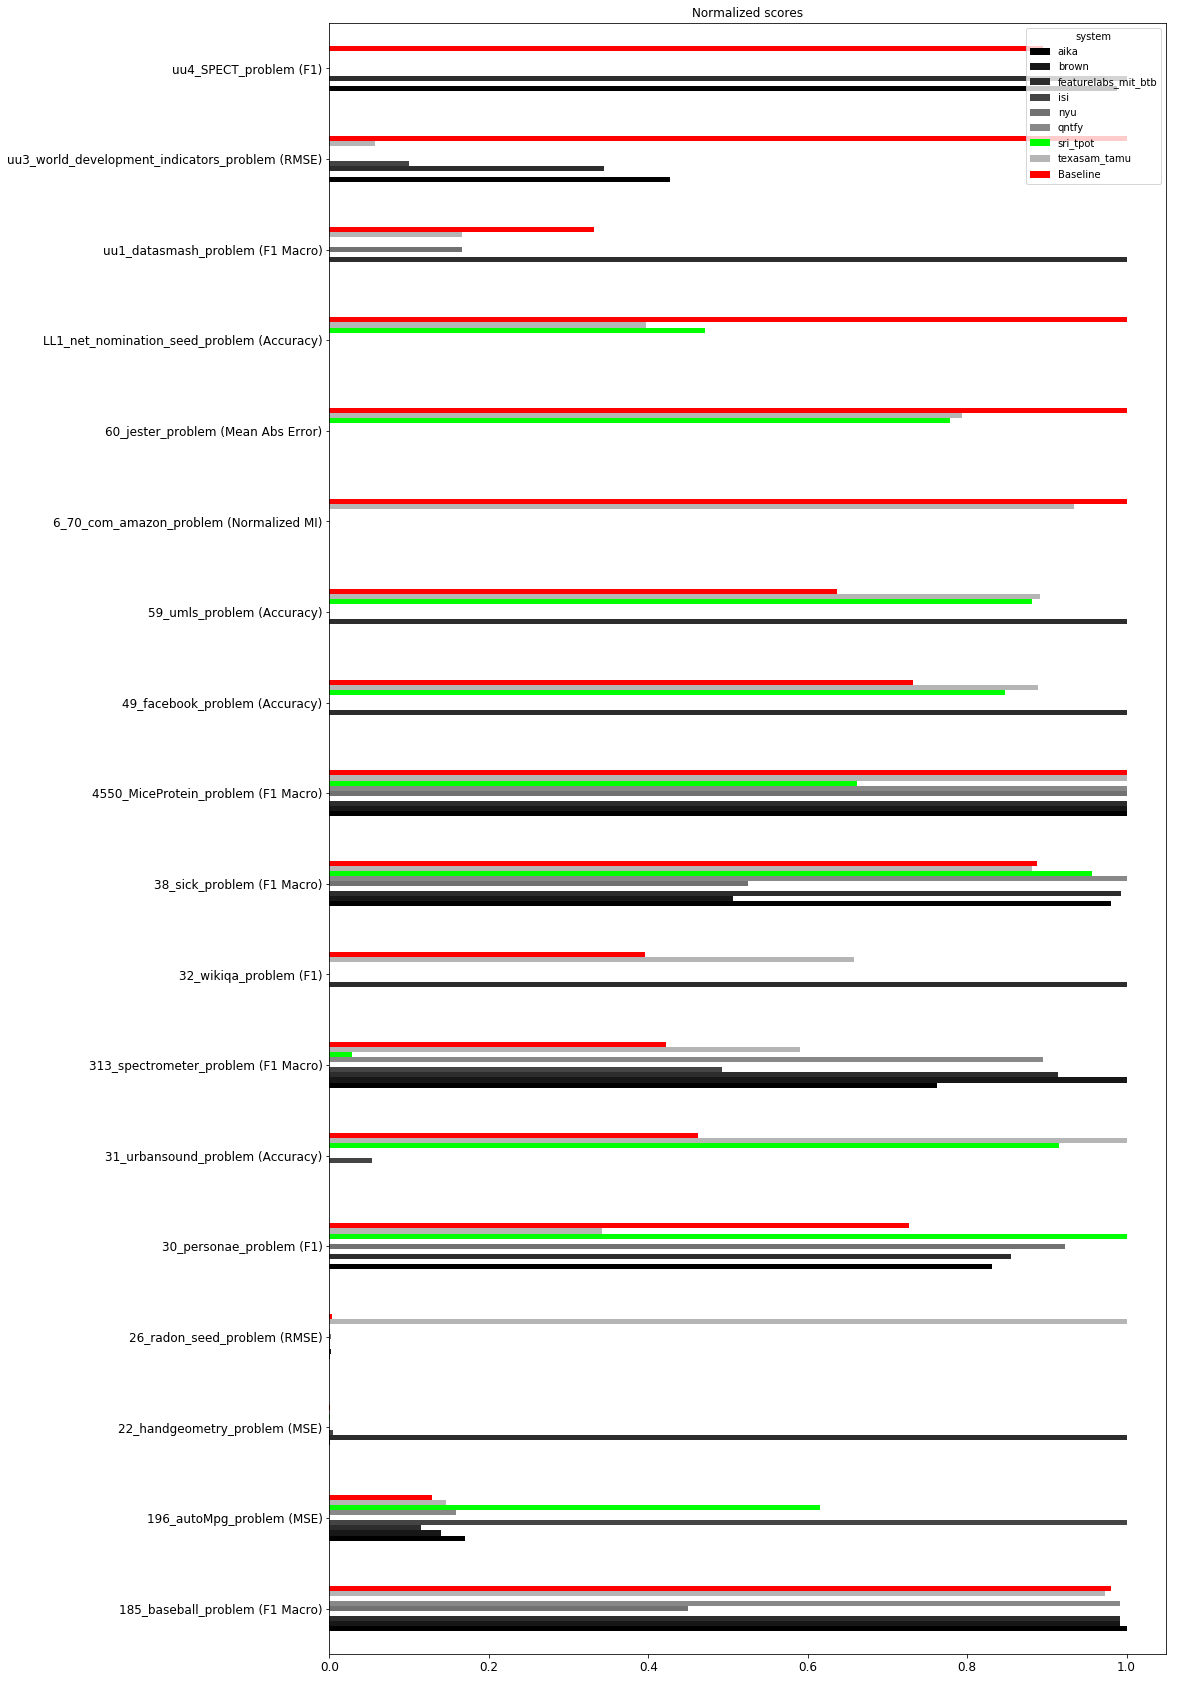

In [338]:
import matplotlib.pyplot as plt
ax = scores.plot(kind='barh', title ="Normalized scores", figsize=(15, 30), legend=True, fontsize=12, cmap=mymap)
plt.show()